In [1]:
import matplotlib.pyplot as plt
from IPython.display import display_markdown
from xray_fov.paths import paths, outs
from xray_fov.data.image import image_directory
from xray_fov.plot.dicom import plot_dicom_multiple
from xray_fov.plot.noise import plot_noise_area
import numpy as np

import matplotlib as mpl
mpl.rcParams["axes.titlesize"] = mpl.rcParams["axes.labelsize"]

In [2]:
import cv2
def resize_to_width(image, width):
    r = 256 / float(image.shape[1])
    dim = (256, int(image.shape[0] * r))
    return cv2.resize(image.astype(float), dsize=dim)

# test-images | photons

<class 'numpy.ndarray'>


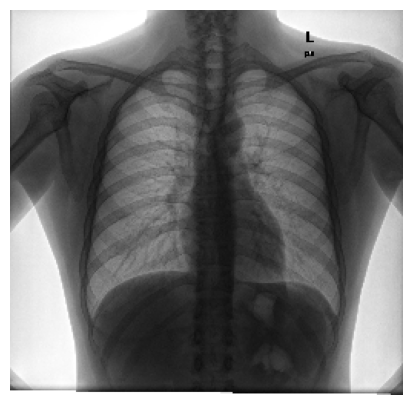

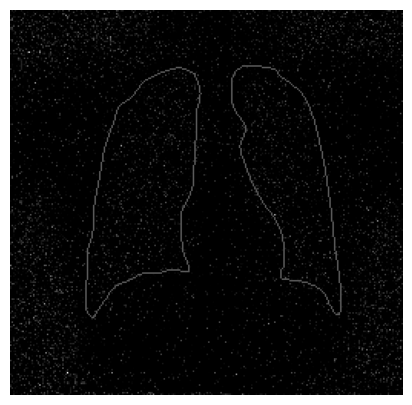

# test-images | thinned

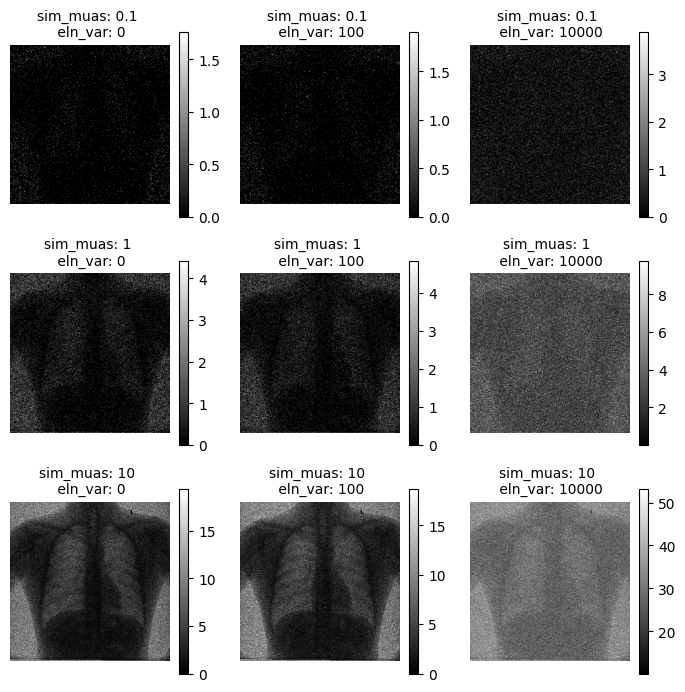

In [3]:
for key, path in paths["nn"].items():
    if "masks" not in key and "test" in key:
        example_index = 8
        
        dicoms = image_directory(path, preload=False)
        display_markdown(f"# {key} | photons", raw=True)
        fig, axe = plt.subplots(figsize=(7, 5))
        photons = dicoms[example_index]["photons"]
        mask = cv2.imread(dicoms[example_index]["file_path"].replace("images","masks")+"/"+dicoms[example_index]["file_name"].replace(".png","_mask.png"))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
        print(type(mask))
        mask = resize_to_width(mask, 256)
        mask = np.uint8(mask)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        resized = resize_to_width(photons, 256)
        axe.imshow(resized, cmap="gray")
        axe.axis('off')
        plt.show()
        fig.savefig(outs["nn-thinning"]+f"/example.svg")
        fig.savefig(outs["nn-thinning"]+f"/example.jpg")
        
        thinned = dicoms[example_index].thinned(0.1, 0)
        resized = resize_to_width(thinned, 256)
        resized = cv2.drawContours(resized, contours, -1, (1,1,1))
        fig, axe = plt.subplots(figsize=(7, 5))
        axe.imshow(resized, cmap="gray")    
        axe.axis('off')
        plt.show()
        fig.savefig(outs["nn-thinning"]+f"/thinned.svg")
        fig.savefig(outs["nn-thinning"]+f"/thinned.jpg")
        
        display_markdown(f"# {key} | thinned", raw=True)
        sim_muas_list = [0.1,1,10]
        eln_var_list = [0,100,10000]
        fig, axes = plt.subplots(len(sim_muas_list),len(eln_var_list),figsize=(7, 7))
        for x, sim_muas in enumerate(sim_muas_list):
            for y, eln_var in enumerate(eln_var_list):
                thinned = dicoms[example_index].thinned(sim_muas, eln_var)
                resized = cv2.resize(thinned.astype(float), dsize=(256, 256))
                im = axes[x,y].imshow(resized, cmap="gray")
                fig.colorbar(im, ax=axes[x,y])
                axes[x,y].set_title(f"sim_muas: {sim_muas} \n eln_var: {eln_var}")
                axes[x,y].axis('off')
        plt.tight_layout()
        plt.show()
        fig.savefig(outs["nn-thinning"]+f"/overview.svg")
        fig.savefig(outs["nn-thinning"]+f"/overview.jpg")